### What is a random number?

From https://mathworld.wolfram.com/RandomNumber.html <br>
"A random number is a number chosen as if by chance from some specified distribution such that selection of a large set of these numbers reproduces the underlying distribution."

### How to people usually generate random numbers?

From https://mathworld.wolfram.com/RandomNumber.html <br>
"Computer-generated random numbers are sometimes called pseudorandom numbers, while the term 'random' is reserved for the output of unpredictable physical processes."

### What is a continuous power-law distribution?

From http://tuvalu.santafe.edu/~aaronc/courses/7000/csci7000-001_2011_L2.pdf <br>

A power-law distribution is defined as follows:
$$p(x) = C x^{-\alpha}, \,\,\, \text{for}\,x \geq x_{min}$$

Note that the definition holds only for $x \geq$ some $x_{min}>0$, because $p(x)$ blows up at $x=0$.

Also, we need $\alpha>1$ so that the pdf can be normalized. You'll get it once we calculate the normalization constant.

Normalization constant:<br>

$$
\int_{x=x_{min}}^{\infty} p(x) dx = 1 
\Rightarrow 
\int_{x=x_{min}}^{\infty} C x^{-\alpha} dx = 1
\Rightarrow 
C \frac{1}{-\alpha + 1}
\left[x^{-\alpha+1}\right]_{x_{min}}^{\infty}  = 1
$$

$$
\Rightarrow 
C \frac{-1}{\alpha - 1}
\left[\frac{1}{x^{\alpha - 1}}
\right]_{x_{min}}^{\infty} = 1
\Rightarrow
C \frac{-1}{\alpha - 1}
\left[0 - \frac{1}{x_{min}^{\alpha - 1}}
\right] = 1
$$

$$
\Rightarrow
C = (\alpha - 1) x_{min}^{\alpha - 1}
= \frac{\alpha - 1}{x_{min}} \frac{1}{x_{min}^{-\alpha}}
$$

So, finally:
$$ p(x) = \frac{\alpha - 1}{x_{min}}
\left(\frac{x}{x_{min}}\right)^{-\alpha}, \,\,\, \text{for}\,x \geq x_{min}$$

### What's special about power laws?

1.<br>
"Many empirical quantities cluster around a typical value."<br>
This "typical value" is usually the mean.

That's not the case with numbers that follow a power-law distribution.

2.<br>
"Only the first $\llcorner \alpha − 1 \lrcorner$ moments of a power-law distribution exist; all the rest are infinite."

$k^{th}$ moment of a power-law distribution:<br>
\begin{align}
\langle x^{k} \rangle & = \int_{x=x_{min}}^{\infty} x^{k} p(x) dx \\
                      & = \frac{\alpha - 1}{x_{min}^{-\alpha+1}}
                          \int_{x_{min}}^{\infty} x^{-\alpha+k} dx \\
                      & = \frac{\alpha - 1}{x_{min}^{-\alpha+1}}
                          \frac{1}{-\alpha + k + 1}
                          \left[x^{-\alpha+k+1}\right]_{x_{min}}^{\infty} \\
                      & = \frac{\alpha - 1}{x_{min}^{-\alpha+1}}
                          \frac{1}{\alpha - k - 1}
                          \frac{1}{x_{min}^{\alpha-k-1}} \\
                      & = x_{min}^{k}
                          \frac{\alpha - 1}{\alpha - k - 1}
                          \,\,\,\,\,\, \text{for}\, \alpha >k+1
\end{align}

So, when $1<\alpha<2$, the first moment (i.e. mean) and higher moments are infinite.

When $2<\alpha<3$, the first moment (i.e. mean) is finite, but second and higher moments are infinite.

"When a moment doesn’t exist, the sample estimate grows with sample size $n$. But, even when the appropriate moment does exist, the sample estimates vary a lot, especially for small values of $n$, and converge very slowly on the true value."

3.<br>
The power-law distribution looks the same across any scale, i.e. the power-law distribution is scale-invariant.

In other words, for some constant $c$:

$$ p(cx) \propto p(x) $$

Because:
\begin{align}
p(cx) & = \frac{\alpha-1}{x_{min}} \left(\frac{cx}{x_{min}}\right)^{-\alpha} \\
& = c^{-\alpha} p(x) \\
\Rightarrow p(cx) & \propto p(x)
\end{align}



"This behavior shows that the relative likelihood between small and large events is the same, no matter what choice of 'small' we make. That is, the density 'scales'."

### Power-law tails

- Some distributions may exhibit a power law only in their tail, i.e for large $x$.

- These distributions can be expressed in the form:
$$ Pr(x) = L(x) x^{-\alpha} $$
where, L(x) is a slowly varying function, st $\lim \limits_{x\to\infty} L(x) = c$, some constant, and $\lim \limits_{x\to\infty} p(x) = x^{-\alpha}$.

For example, consider the shifted power-law distribution:
$$
Pr(x) = \frac{\alpha-1}{k+x_{min}} \left(\frac{k+x}{k+x_{min}}\right)^{-\alpha}
\,\,\,\,\,\, \text{for}\, x \geq x_{min}
$$

Here, $k$ is some constant.

When $k=0$, we get back the usual power-law pdf.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def ShiftedPowerLaw(x, alpha, xmin, k):
    part1 = (alpha-1)/(k+xmin)
    part2 = ((k+x)/(k+xmin))**(-alpha)
    pdf = part1*part2
    return pdf

In [3]:
alpha = 2.5
xmin = 7.

In [4]:
x_line = np.arange(1, 10000, 0.1)

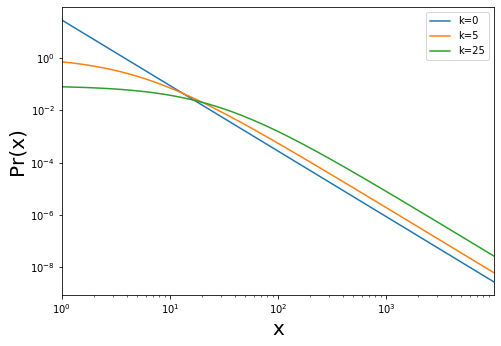

In [5]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])

for k in [0, 5, 25]:
    y_line = ShiftedPowerLaw(x_line, alpha, xmin, k)
    ax.plot(x_line, y_line, label="k={}".format(k))

ax.set_xlim([x_line[0], x_line[-1]])
# ax.set_ylim([1e-8, 1])

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlabel("x", fontsize=20)
ax.set_ylabel("Pr(x)", fontsize=20)
plt.legend(loc="upper right")
plt.show()

$$
Pr(x) = \frac{\alpha-1}{k+x_{min}} \left(\frac{k+x}{k+x_{min}}\right)^{-\alpha}
\,\,\,\,\,\, \text{for}\, x \geq x_{min}
$$

We can write this as:
\begin{align}
Pr(x) & = C (k+x)^{-\alpha}
\,\,\,\,\,\, \text{for}\, x \geq x_{min} \\
& = C (k+x)^{-\alpha} \frac{x^{-\alpha}}{x^{-\alpha}} \\
& = C \left(1 + \frac{k}{x}\right)^{-\alpha} x^{-\alpha} \\
& = L(x) x^{-\alpha} \\
\end{align}

Here, $\lim \limits_{x \to \infty} L(x) = \lim \limits_{x \to \infty} C \left(1 + \frac{k}{x}\right)^{-\alpha} = C$


"The function $L(x)$ describes exactly how the deviations from the power-law form decayas we move further out into the tail. When $x \lesssim k$, the “body” term $L(x)$ is large compared to the tail term $x^{−\alpha}$, leading to curvature on the log-log plot."